<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Korrelyaciya_i_korrelyacionnyj_analiz/netology_corr_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Корреляция и регрессия

**Булыгин Олег**
* [Я в LinkedIn](https://www.linkedin.com/in/obulygin/)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

Поработаем с данными (анонимизированными) компании, которая предлагает услуги стилистов. Что более важно с точки зрения дохода: сайт или приложение?

Значимые столбцы:

* Avg. Session Length: среднее время консультации стилиста оффлайн
* Time on App: среднее время клиента в приложении
* Time on Website: средняя время клиента на сайте
* Length of Membership: сколько лет клиент пользуется услугами компании.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/content/main/ecommers_customers/ecommerce.csv')

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Корреляция

Посмотрим на график взаимосвязи времени, проведенного на сайте и трат клиента.

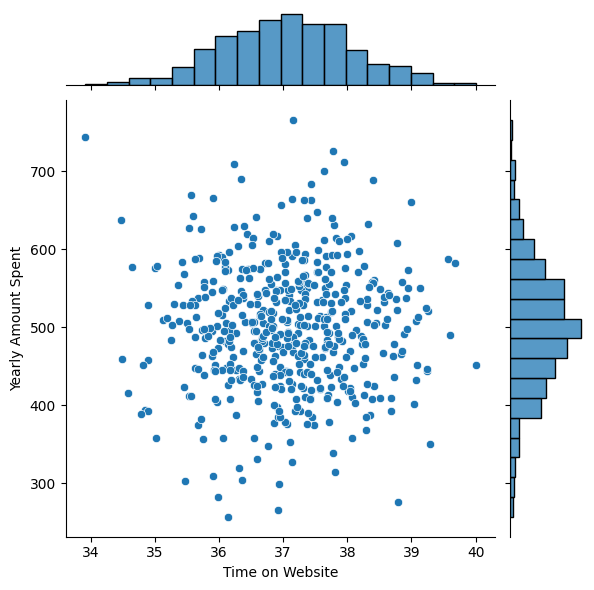

In [ ]:
sns.jointplot(x='Time on Website', y ='Yearly Amount Spent', data=df)

Аналогично посмотрим на время в приложении и траты.

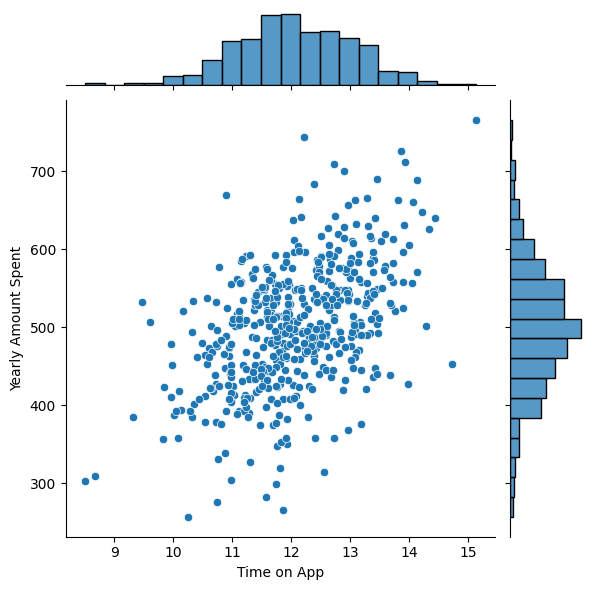

In [ ]:
sns.jointplot(x='Time on App', y ='Yearly Amount Spent', data=df)

Для примера построим hex bin plot для двух признаков.

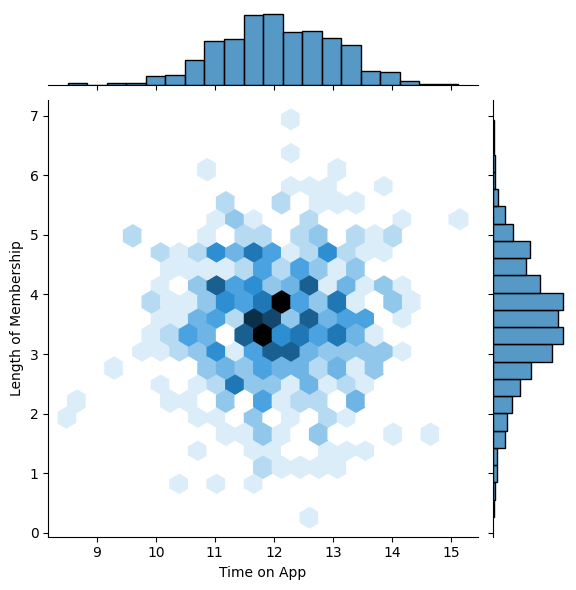

In [ ]:
sns.jointplot(x='Time on App', y ='Length of Membership', data=df, kind='hex')

Построим pairplot, чтобы выдвинуть гипотезы о взаимосвязи признаков.

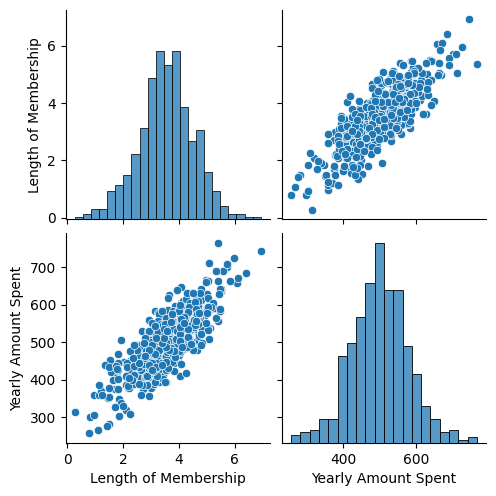

In [ ]:
sns.pairplot(df)

Мы видим явную взаимосвязь трат с Length of Membership.

Связь явно линейная.

In [ ]:
# считаем коэф. корреляции Пирсона
df[['Length of Membership', 'Yearly Amount Spent']].corr()

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.809084
Yearly Amount Spent,0.809084,1.000000



Коэффициенты корреляции Спирмена и Кэнделла оба измеряют монотонные отношения между двумя переменными. Они оба не требуют нормального распределения данных и могут быть применены к как непрерывным, так и порядковым данным.

В большинстве случаев интерпретации коэффициента Кэнделла и коэффициента корреляции рангов Спирмена очень похожи и, как правило, приводят к одинаковым выводам.

In [ ]:
# считаем коэф. корреляции Спирмана
df[['Length of Membership', 'Yearly Amount Spent']].corr(method='spearman')

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.779915
Yearly Amount Spent,0.779915,1.000000


In [ ]:
# считаем коэф. корреляции Кенделла
df[['Length of Membership', 'Yearly Amount Spent']].corr(method='kendall')

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.586244
Yearly Amount Spent,0.586244,1.000000


In [ ]:
# можем посчитать коэффициенты корреляции между всеми показателями
df.corr()

<ipython-input-15-0a40ca5e14c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<ipython-input-16-6ae5060dfd5c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='crest')


<Axes: >

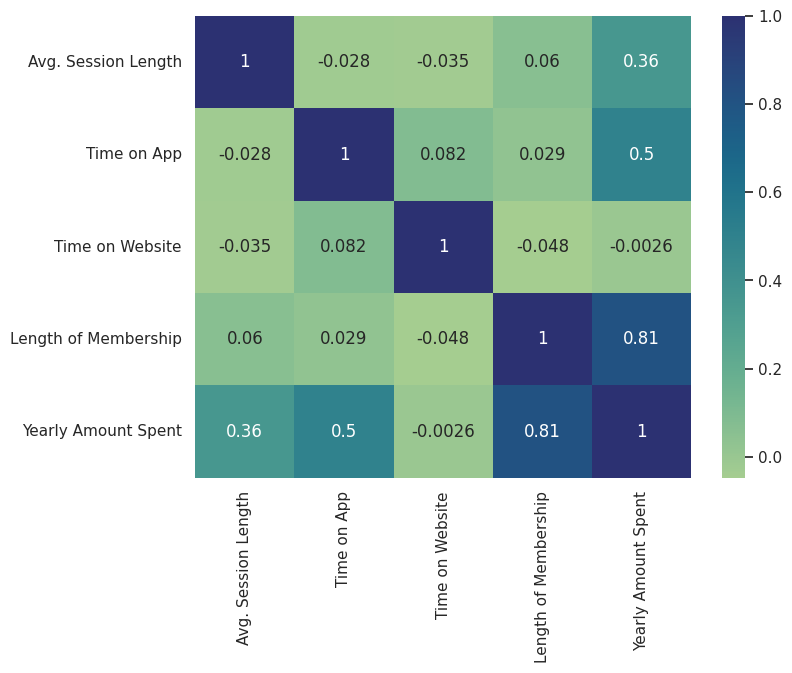

In [ ]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df.corr(), annot=True, cmap='crest')

## Регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Length of Membership']]
y = df['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([64.70352335])

In [ ]:
lm.intercept_

270.41233040030147

In [ ]:
# y = 64,7 * x + 270,4

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([492.64044559, 519.62304923, 544.64502678, 460.73196982,
       492.27164725, 514.53671977, 484.59072063, 518.49661694,
       450.25711415, 517.96999179, 477.64516783, 436.48297146,
       425.64124559, 554.89119933, 462.35914245, 450.54455366,
       512.82880224, 468.55833919, 434.24450245, 515.10187531,
       475.07552301, 493.45138608, 470.10922615, 580.62122587,
       454.03725217, 531.45132757, 591.22951146, 527.57793851,
       456.57891748, 398.33165725, 548.76666133, 499.00092209,
       500.0474678 , 322.2732215 , 535.99073732, 477.90078725,
       551.85831986, 438.78947531, 477.18057743, 491.35470247,
       500.83550586, 358.58214455, 493.44652663, 504.66270095,
       452.88255762, 559.65536395, 534.57226984, 510.67004875,
       362.86226947, 415.68130268, 490.50281083, 462.72876116,
       588.77426726, 566.38486245, 553.12575675, 489.88994841,
       388.55350171, 368.5401139 , 564.27601548, 557.82889638,
       449.56680675, 411.59651635, 530.48622414, 458.39

In [ ]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
220    519.372977
176    532.717486
320    368.654785
153    657.019924
231    512.552534
Name: Yearly Amount Spent, Length: 125, dtype: float64

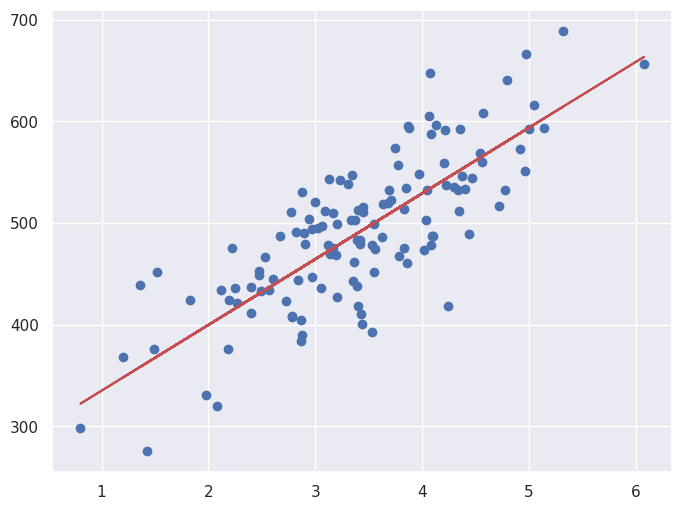

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.6169758058184684
MAE: 36.906874929496865
MSE: 2093.288957050209
RMSE: 45.752474873499565


Посмотрим ещё на остатки

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

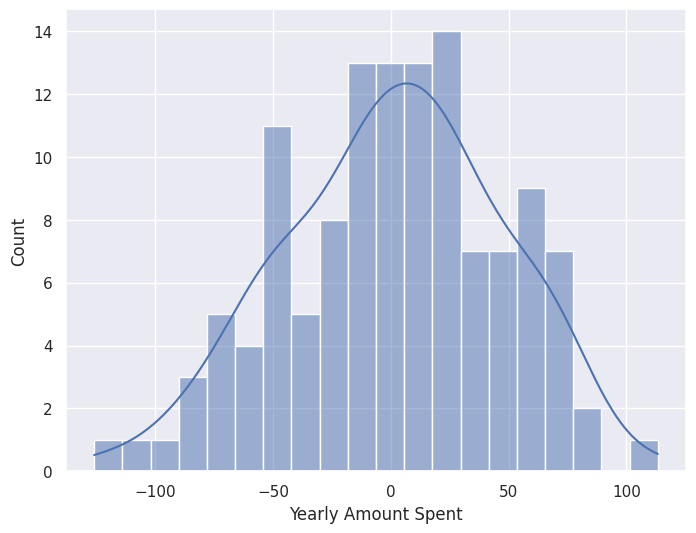

In [ ]:
sns.histplot((y_test-y_pred), kde=True, bins=20)

А теперь тоже самое проделаем для модели со всеми признаками

In [ ]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([25.69083176, 38.68815596,  0.45279908, 61.71050259])

In [ ]:
lm.intercept_

-1050.707388040164

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([403.36087526, 542.49652255, 426.79061944, 501.98000522,
       409.90016607, 569.95203575, 531.68712688, 506.10842617,
       408.47031037, 473.71493101, 441.30201774, 425.05268133,
       424.93655583, 527.27340348, 431.24084639, 423.76635768,
       575.73837263, 484.73375076, 458.15131382, 481.73089746,
       502.04156769, 513.39008852, 507.55579577, 646.54871994,
       449.98886069, 496.07689142, 556.2403381 , 554.77842999,
       399.41536028, 325.54121912, 532.65563818, 477.96272707,
       500.87585571, 305.69578623, 505.5581936 , 483.59198597,
       518.72294437, 437.96539568, 456.5172541 , 470.84325957,
       494.20975196, 445.1840947 , 508.62394573, 500.91793768,
       488.73418105, 535.19202701, 595.04122136, 513.81284729,
       280.44329112, 433.04560196, 421.42401729, 481.13163584,
       584.63530063, 608.71467973, 564.01947373, 494.49273084,
       394.32484472, 456.44102533, 572.84643521, 499.46263062,
       512.73482583, 391.89419968, 479.80345348, 481.34

In [ ]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.9806693454258992
MAE: 8.460454170141151
MSE: 105.64514296279478
RMSE: 10.278382312542902


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

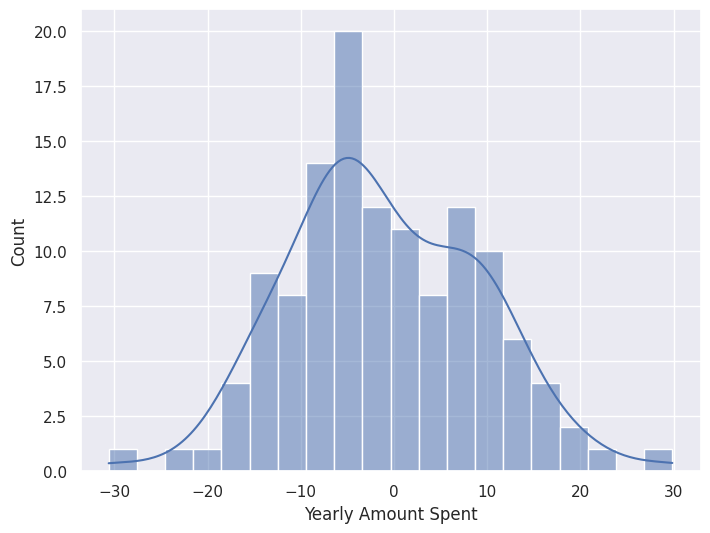

In [ ]:
sns.histplot((y_test-y_pred), kde=True, bins=20)

In [ ]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Коэффициенты'])

,Коэффициенты
Avg. Session Length,25.690832
Time on App,38.688156
Time on Website,0.452799
Length of Membership,61.710503
